In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rasterio
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = [18, 10]

In [3]:
BASE_PATH = '/home/jack/data/EUMETSAT/testing/one-hour/'

In [4]:
def open_exif(filename):
    return pd.read_csv(
        os.path.join(BASE_PATH, filename),
        sep=' : ',
        header=None,
        squeeze=True,
        index_col=0
    )

tiff_exif = open_exif('format-3-tiff/extracted/tiff/tiff_exif.txt')
tiff_exif

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


0
ExifTool Version Number                                                        11.16
File Name                             HRV_MSG3-SEVI-MSG15-0100-NA-20190423080416.tif
Directory                                                                          .
File Size                                                                     118 MB
File Modification Date/Time                                2019:04:25 01:01:54+01:00
File Access Date/Time                                      2019:09:09 16:09:31+01:00
File Inode Change Date/Time                                2019:09:09 16:09:15+01:00
File Permissions                                                           rw-rw-rw-
File Type                                                                       TIFF
File Type Extension                                                              tif
MIME Type                                                                 image/tiff
Exif Byte Order                                            Big-

In [5]:
png_exif = open_exif('format-1-png/extracted/png/png_exif.txt')
png_exif

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


0
ExifTool Version Number                                                     11.16
File Name                          HRV_MSG3-SEVI-MSG15-0100-NA-20190423080416.png
Directory                                                                       .
File Size                                                                  6.7 MB
File Modification Date/Time                             2019:04:25 01:14:05+01:00
File Access Date/Time                                   2019:09:09 11:48:22+01:00
File Inode Change Date/Time                             2019:09:09 11:48:22+01:00
File Permissions                                                        rw-r--r--
File Type                                                                     PNG
File Type Extension                                                           png
MIME Type                                                               image/png
Image Width                                                                 11136
Image Height  

In [6]:
netcdf = xr.open_dataset(
    os.path.join(
        BASE_PATH, #                                                                         20190423080416
        'format-2-nc/extracted/W_XX-EUMETSAT-Darmstadt,VIS+IR+HRV+IMAGERY,MSG3+SEVIRI_C_EUMG_20190423080010.nc')
)

In [28]:
for key in ['num_columns_hrv', 'num_rows_hrv']:
    print('{:>40s} : {}'.format(key, netcdf.dims[key]))

                         num_columns_hrv : 5568
                            num_rows_hrv : 4176


In [29]:
for key, value in netcdf.dims.items():
    print('{:>40s} : {}'.format(key, value))

                     acknowledgement_dim : 4
                          alpha_beta_dim : 2
                   atmospheric_model_dim : 360
             attitude_polynomial_dim_col : 8
             attitude_polynomial_dim_row : 100
                            channels_dim : 12
                        channels_hrv_dim : 3
                     channels_vis_ir_dim : 11
                    corner_histogram_dim : 128
                           detectors_dim : 42
                       detectors_hrv_dim : 9
                    detectors_vis_ir_dim : 33
                             entropy_dim : 3
                       ephemeris_dim_col : 8
                       ephemeris_dim_row : 100
                  ephemeris_starcoef_dim : 20
                ephemeris_starcoef_dim_8 : 160
                  extracted_horizons_dim : 4
             fir_filter_coefficients_dim : 16
                           histogram_dim : 256
               landmark_observations_dim : 50
                         num_columns

In [ ]:
netcdf.ch12.plot()

In [30]:
len(np.unique(netcdf.ch12.values))

509

In [31]:
len(np.unique(netcdf.ch1.values))

691

In [32]:
len(np.unique(netcdf.ch2.values))

653

In [33]:
getattr(netcdf, 'ch12')

<xarray.DataArray 'ch12' (num_rows_hrv: 4176, num_columns_hrv: 5568)>
array([[-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031],
       [-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031],
       [-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031],
       ...,
       [-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031],
       [-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031],
       [-1.949031, -1.949031, -1.949031, ..., -1.949031, -1.949031, -1.949031]],
      dtype=float32)
Dimensions without coordinates: num_rows_hrv, num_columns_hrv
Attributes:
    long_name:  HRV Channel
    units:      1
    valid_min:  0
    valid_max:  1023

In [34]:
netcdf.ch12.attrs['valid_max']

1023

## Compare TIFF HRV image with netCDF HRV image

In [35]:
tiff_image = rasterio.open(
    os.path.join(
        BASE_PATH, 'format-3-tiff/extracted/tiff/HRV_MSG3-SEVI-MSG15-0100-NA-20190423080416.tif'))

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [36]:
tiff_image.dtypes

('uint8',)

In [37]:
tiff_image_data = tiff_image.read(1)

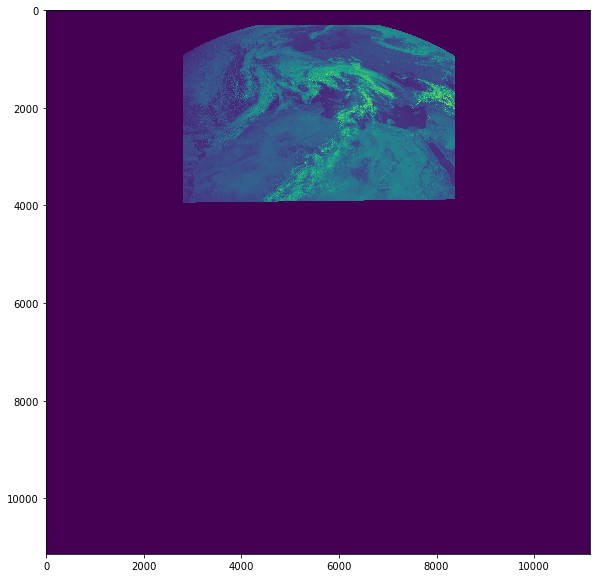

In [38]:
plt.imshow(tiff_image_data)

In [12]:
tiff_image_data.shape

(11136, 11136)

In [13]:
tiff_image_data.dtype

dtype('uint8')

In [14]:
tiff_image_data[:4176, :].shape

(4176, 11136)

In [39]:
def crop(img):
    img_middle = (img.shape[1] / 2) + 18
    hrv_image_width = 5568

    img_start_col = int(round(
        img_middle - (hrv_image_width / 2)
    ))

    img_end_col = int(round(
        img_middle + (hrv_image_width / 2)
    ))

    return img[:4176, img_start_col:img_end_col].copy()

tiff_image_cropped = crop(tiff_image_data)
tiff_image_cropped.shape

del tiff_image
del tiff_image_data

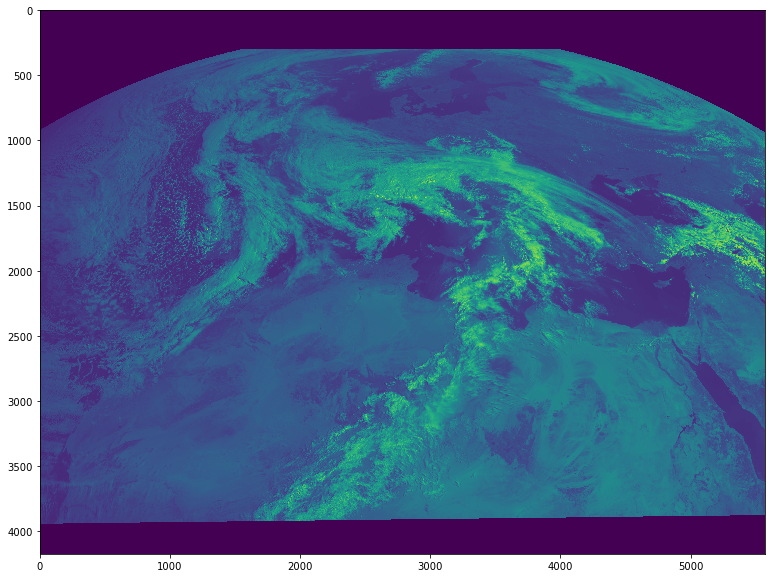

In [17]:
plt.imshow(tiff_image_cropped);

In [18]:
len(np.unique(tiff_image_cropped))

131

In [19]:
np.sort(np.unique(tiff_image_cropped))

array([  0,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144], dtype=uint8)

In [20]:
tiff_image_norm = tiff_image_cropped / tiff_image_cropped.max()

In [21]:
tiff_image_norm.dtype

dtype('float64')

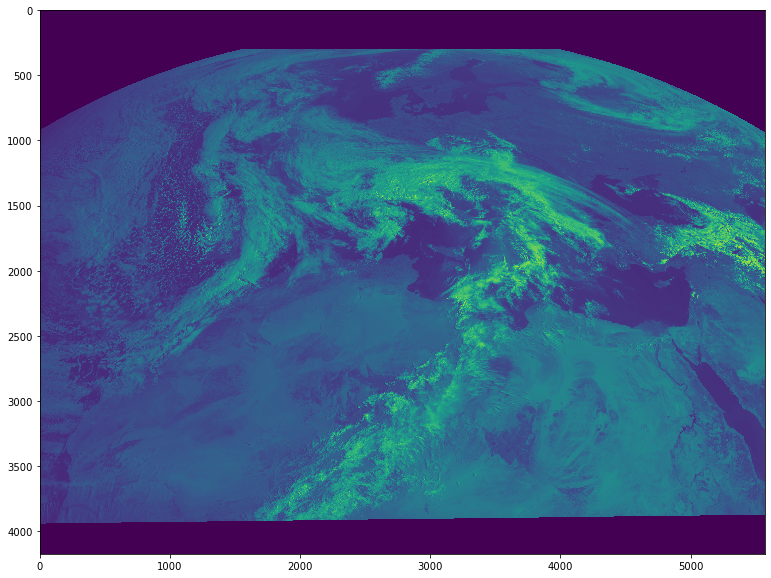

In [40]:
net_cdf_image = netcdf.ch12.values[::-1, :].astype(np.float64)
plt.imshow(net_cdf_image);

In [23]:
net_cdf_image.max()

20.063556671142578

In [41]:
net_cdf_image_norm = net_cdf_image.clip(min=0) / net_cdf_image.max()

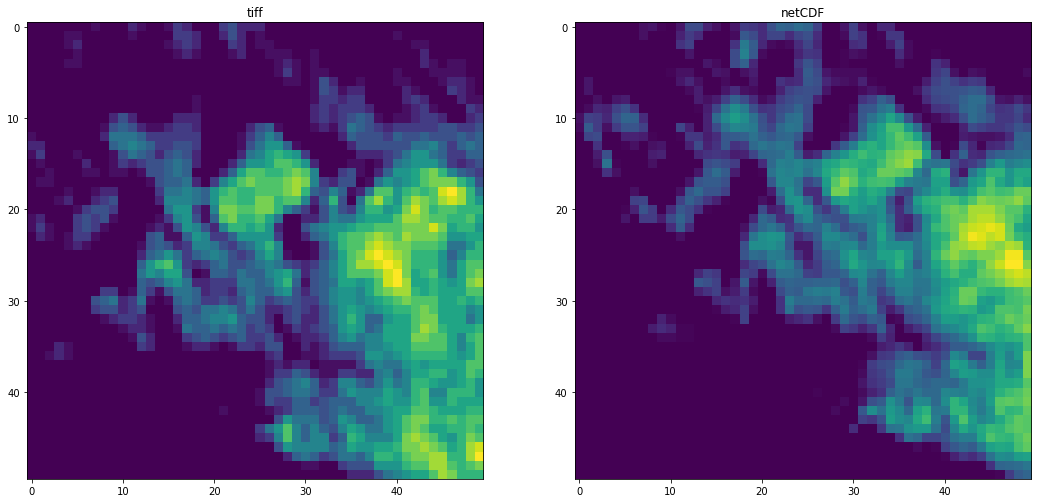

In [42]:
fig, axes = plt.subplots(ncols=2)

def norm(img):
    img = img.astype(np.float64)
    img -= img.min()
    img /= img.max()
    return img

def gamma(img):
    img = img[1800:1850, 3750:3800]
    img = img.copy().astype(np.float64)
    img = norm(img)
    #print(img.min(), img.max(), len(np.unique(img)))
    img -= 0.8
    img = img.clip(min=0, max=1)
    #print(img.min(), img.max(), len(np.unique(img)))
    img = norm(img)
    #print(img.min(), img.max(), len(np.unique(img)))
    #print()
    return img

i = 0
#ax = axes[i]
#ax.imshow(tiff_image_norm - net_cdf_image_norm)
#ax.set_title('diff')
# i += 1

ax = axes[i]
ax.imshow(gamma(tiff_image_cropped))
ax.set_title('tiff')
i += 1

ax = axes[i]
ax.imshow(gamma(net_cdf_image))
ax.set_title('netCDF');

In [43]:
img_diff = tiff_image_norm - net_cdf_image_norm

NameError: name 'tiff_image_norm' is not defined

In [28]:
img_diff.max()

0.08702380904848288

In [29]:
img_diff.min()

-0.004365149079654573

## Compare with JPEG

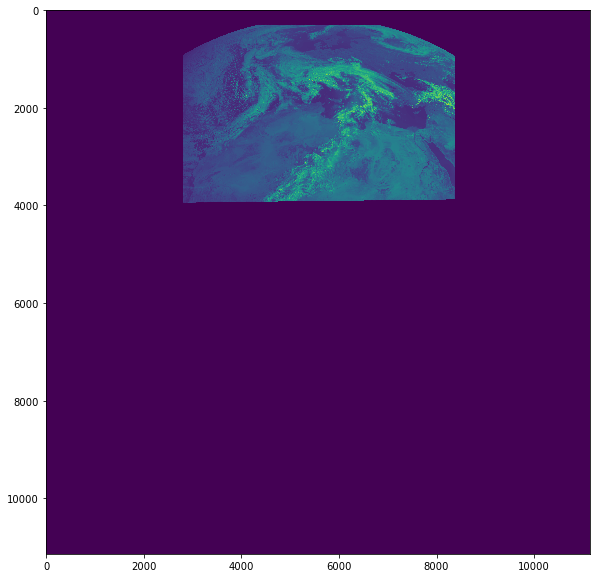

In [44]:
jpeg_image = rasterio.open(
    os.path.join(
        BASE_PATH,  
        'format-4-jpeg/extracted/jpeg/HRV_MSG3-SEVI-MSG15-0100-NA-20190423080416.jpg'))

jpeg_image_data = jpeg_image.read(1)
plt.imshow(jpeg_image_data);

In [31]:
jpeg_image_data.dtype

dtype('uint8')

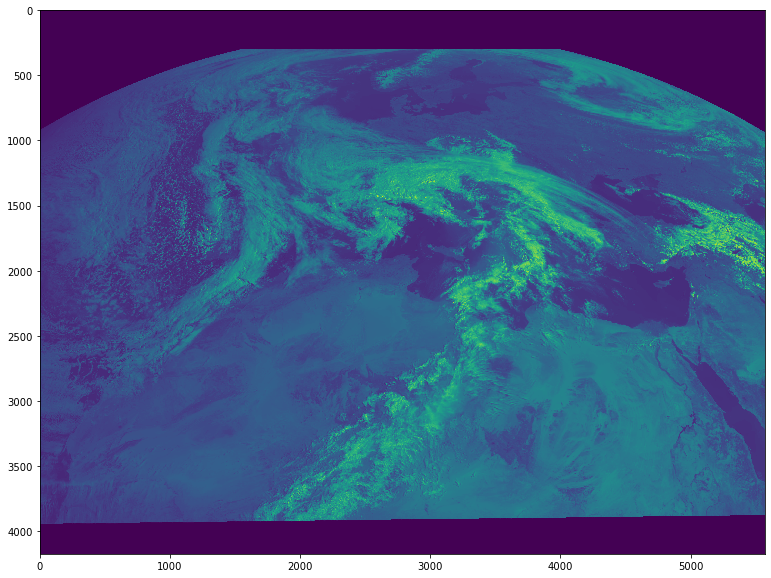

In [45]:
jpeg_image_cropped = crop(jpeg_image_data)
del jpeg_image_data
plt.imshow(jpeg_image_cropped);

In [33]:
np.sort(np.unique(tiff_image_cropped))

array([  0,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144], dtype=uint8)

In [34]:
np.sort(np.unique(jpeg_image_cropped))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146], dtype=uint8)

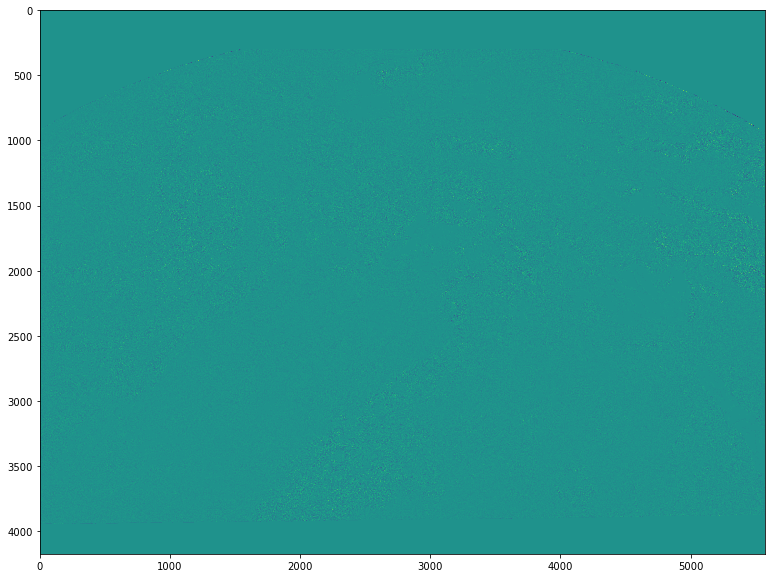

In [35]:
tiff_minus_jpeg = tiff_image_cropped.astype(np.float32) - jpeg_image_cropped.astype(np.float32)
plt.imshow(tiff_minus_jpeg);

In [46]:
def zoom(img):
    img = img[1000:1100, 1000:1100].copy()
    print(len(np.unique(img)))
    return img

18
47
51
18
47
51


Text(0.5, 1.0, 'JPEG')

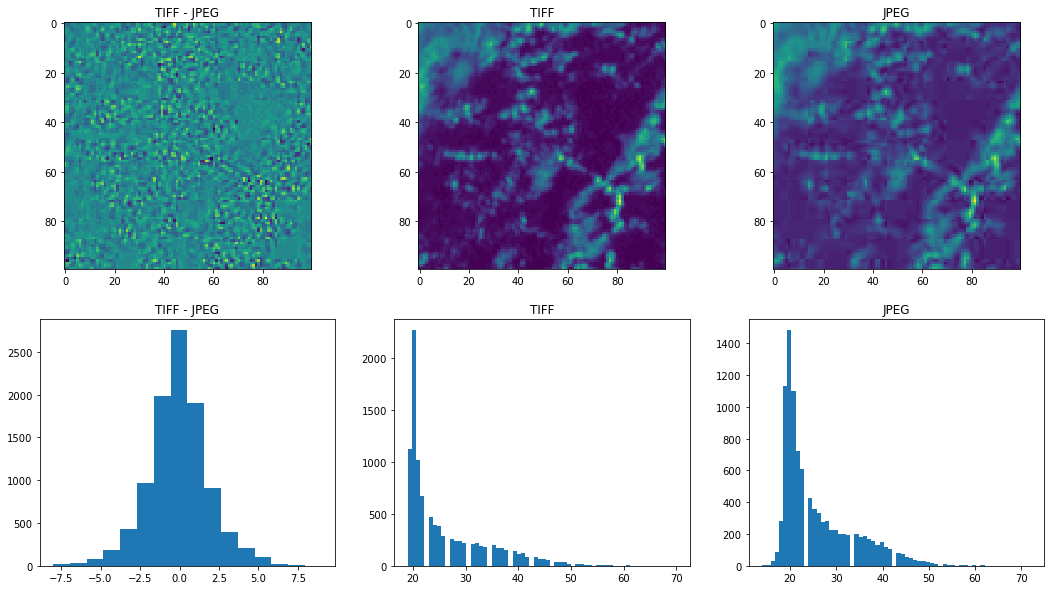

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=2)

def zoom(img):
    img = img[1000:1100, 1000:1100].copy()
    print(len(np.unique(img)))
    return img

row = 0
col = 0
ax = axes[row][col]
ax.imshow(zoom(tiff_minus_jpeg))
ax.set_title('TIFF - JPEG')
col += 1

ax = axes[row][col]
ax.imshow(zoom(tiff_image_cropped))
ax.set_title('TIFF')
col += 1

ax = axes[row][col]
ax.imshow(zoom(jpeg_image_cropped))
ax.set_title('JPEG')

row += 1
col = 0
ax = axes[row][col]
ax.hist(zoom(tiff_minus_jpeg).flatten(), bins=16)
ax.set_title('TIFF - JPEG')
col += 1

ax = axes[row][col]
ax.hist(zoom(tiff_image_cropped).flatten(), bins=64)
ax.set_title('TIFF')
col += 1

ax = axes[row][col]
ax.hist(zoom(jpeg_image_cropped).flatten(), bins=64)
ax.set_title('JPEG')

In [37]:
tiff_minus_jpeg.min(), tiff_minus_jpeg.max()

(-29.0, 28.0)

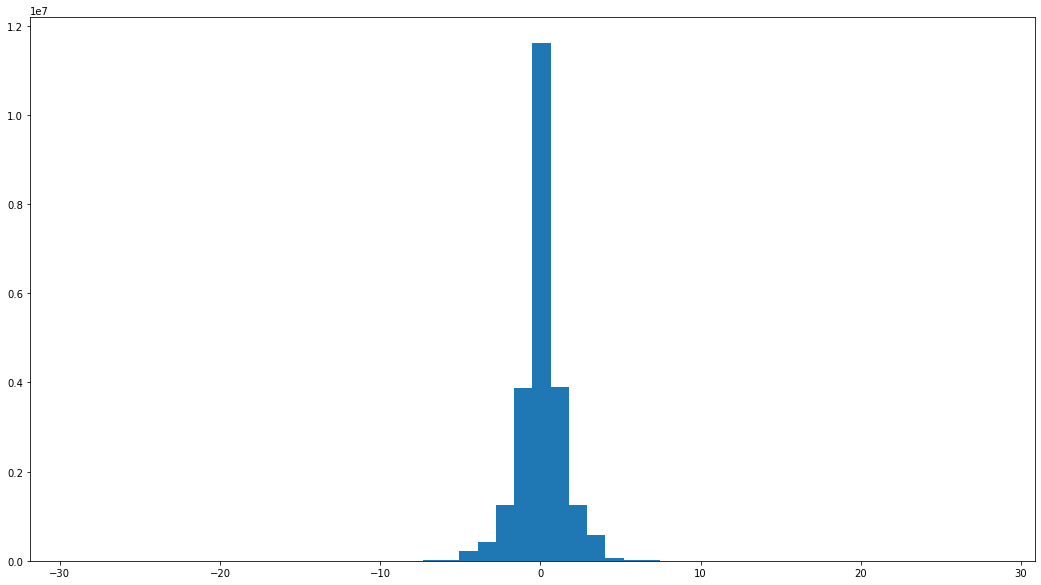

In [38]:
plt.hist(tiff_minus_jpeg.flatten(), bins=50);

## Compare with PNG

In [ ]:
png_image = rasterio.open(
    os.path.join(
        BASE_PATH,           
        'format-1-png/extracted/png/HRV_MSG3-SEVI-MSG15-0100-NA-20190423080416.png'))

png_image_data = png_image.read(1)
plt.imshow(png_image_data);

In [ ]:
png_image_data.dtype

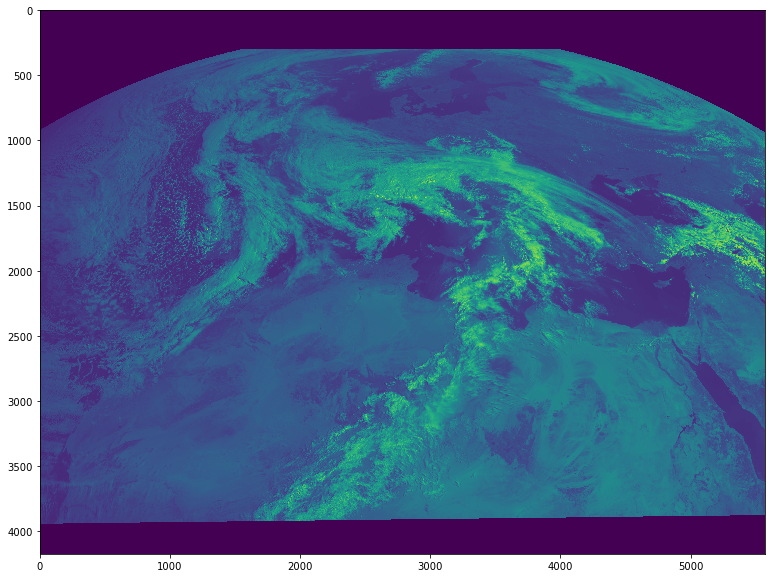

In [41]:
png_image_cropped = crop(png_image_data)
del png_image_data
plt.imshow(png_image_cropped)

In [42]:
np.sort(np.unique(png_image_cropped))

array([  0,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144], dtype=uint8)

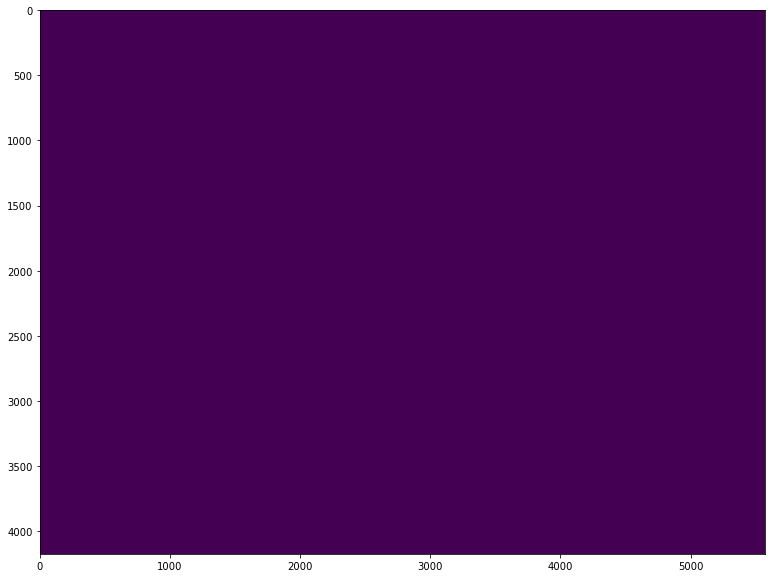

In [43]:
tiff_minus_png = tiff_image_cropped.astype(np.float32) - png_image_cropped.astype(np.float32)
plt.imshow(tiff_minus_png);

In [44]:
tiff_minus_png.min(), tiff_minus_png.max()

(0.0, 0.0)

## HRIT

In [4]:
import os
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy import find_files_and_readers
from datetime import datetime

In [5]:
os.environ['XRIT_DECOMPRESS_PATH'] = "/usr/bin/xRITDecompress"

In [13]:
files = find_files_and_readers(
    base_dir='/home/jack/data/EUMETSAT/testing/one-hour/HRIT/bzip/extracted/',
    reader='seviri_l1b_hrit')

scn = Scene(filenames=files)

In [14]:
scn.load(['HRV'])

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/pyresample/geometry.py:959: RuntimeWarning: invalid value encountered in double_scalars
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)


In [15]:
hrit = scn.to_xarray_dataset()

In [16]:
hrit_hrv = hrit['HRV'].values

In [17]:
del hrit

In [18]:
hrit_hrv = hrit_hrv[::-1, ::-1]  # flip

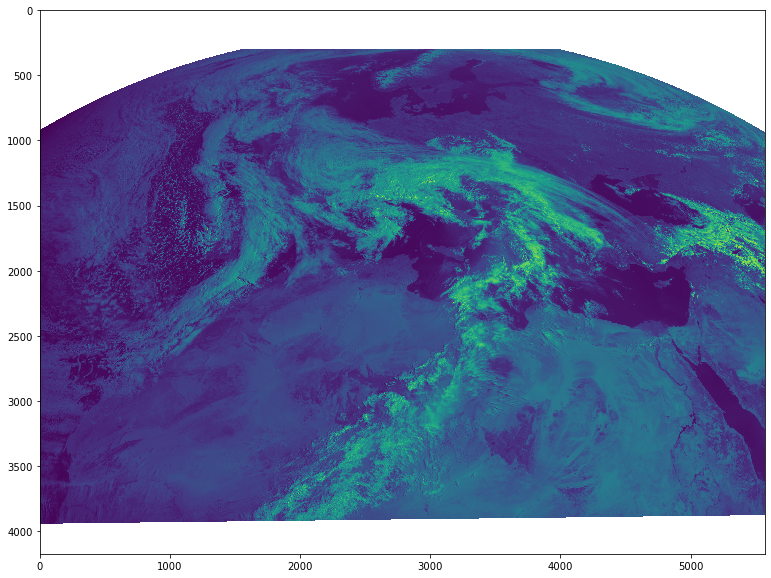

In [19]:
plt.imshow(hrit_hrv);

In [20]:
len(np.unique(hrit_hrv.flatten()))

3984990

## Native

In [6]:
#native_files = find_files_and_readers(
#    base_dir='/home/jack/data/EUMETSAT/testing/one-hour/native/extracted/',
#    reader='seviri_l1b_native')

native_scn = Scene(
    filenames=['/home/jack/data/EUMETSAT/testing/one-hour/native/extracted/MSG3-SEVI-MSG15-0100-NA-20190423080416.939000000Z-20190423080435-1348812.nat'],
    reader='seviri_l1b_native')

In [7]:
native_scn.load(['HRV'])

In [8]:
native = native_scn.to_xarray_dataset()

In [9]:
native = native['HRV'].values

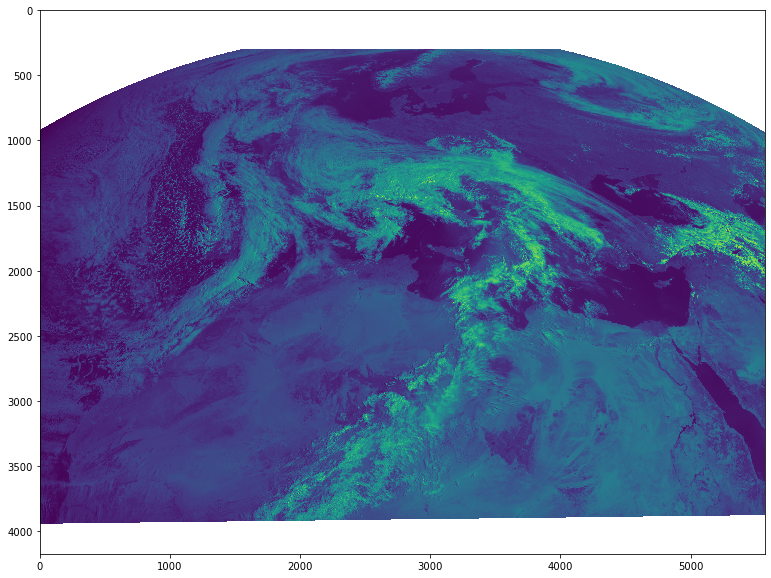

In [10]:
plt.imshow(native);

In [12]:
len(np.unique(native.flatten()))

3984990

In [21]:
np.testing.assert_array_equal(
    native, hrit_hrv)

## Master comparison

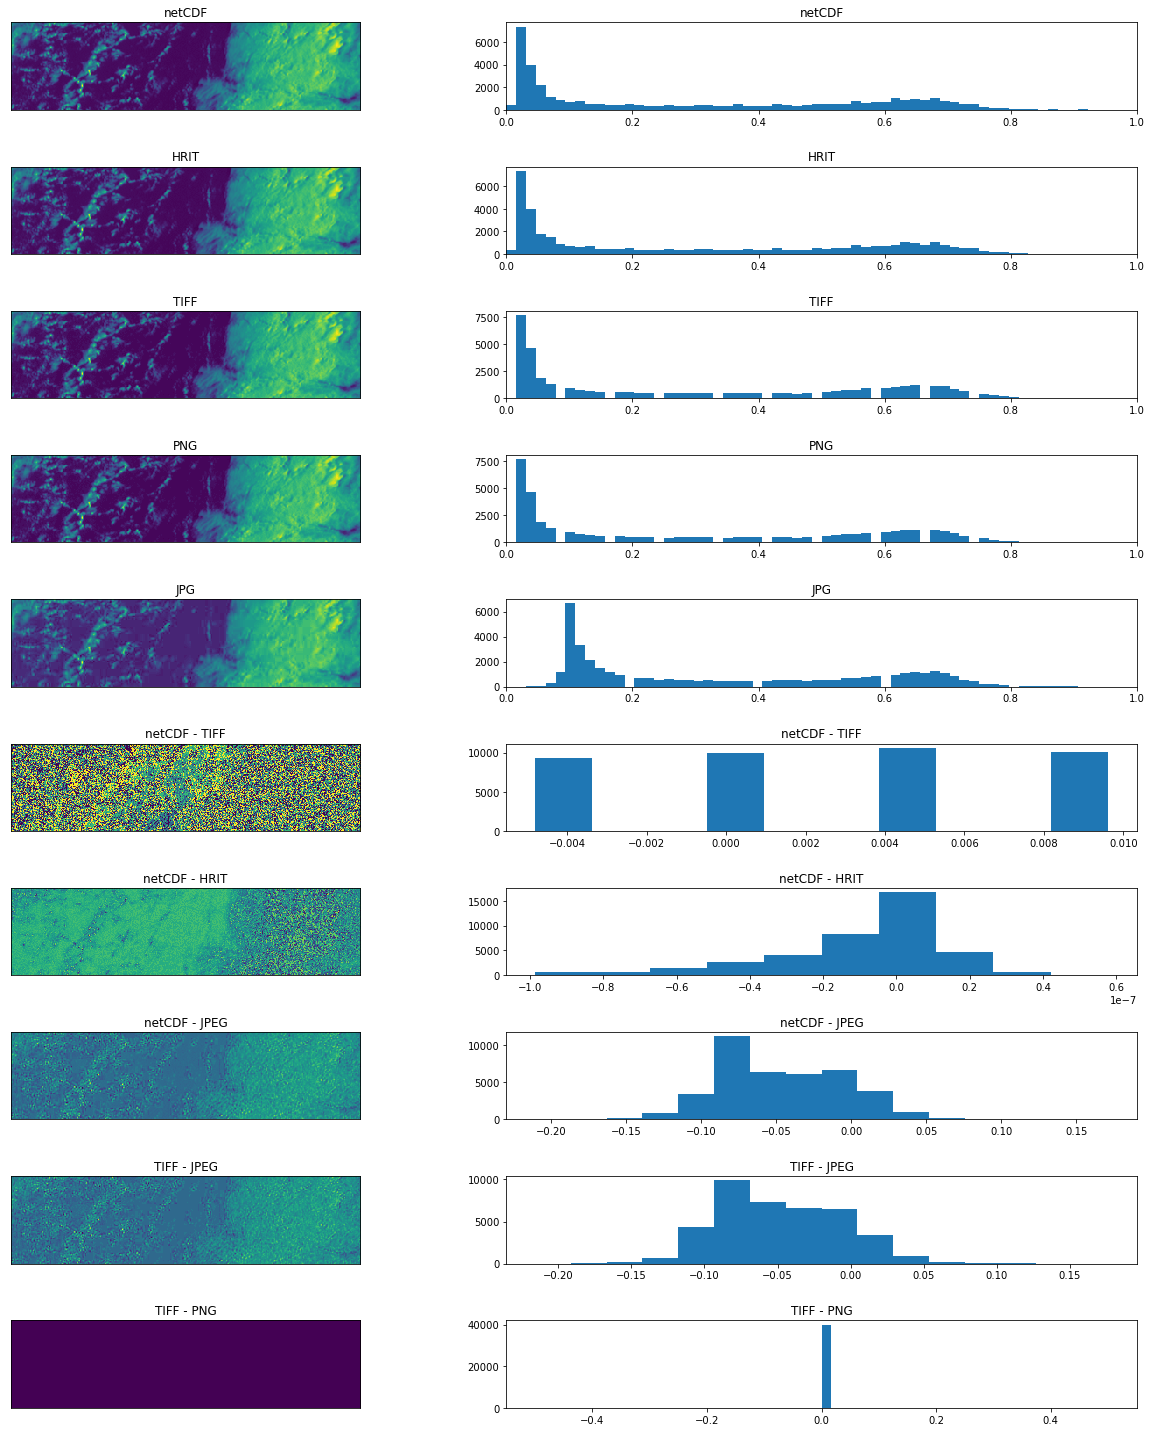

In [61]:
fig, axes = plt.subplots(ncols=2, nrows=10, figsize=(18, 20))

def zoom(img):
    img = img[1000:1100, 1000:1400].copy()
    return img

def plot_img_and_hist(row_axes, img, title='', bins=64, hist_xlim=None, zoom_and_norm=True):
    if zoom_and_norm:
        img = zoom(img)
        img = norm(img)
    row_axes[0].imshow(img)
    row_axes[0].set_xticks([])
    row_axes[0].set_yticks([])
    row_axes[1].hist(img.flatten(), bins=bins)
    if hist_xlim is not None:
        row_axes[1].set_xlim(hist_xlim)
    for ax in row_axes:
        ax.set_title(title)
        
def img_diff(img1, img2):
    return norm(zoom(img1)) - norm(zoom(img2))

row = 0

plot_img_and_hist(axes[row], net_cdf_image, 'netCDF', hist_xlim=(0, 1))
row += 1 

plot_img_and_hist(axes[row], hrit_hrv, 'HRIT', hist_xlim=(0, 1))
row += 1 

plot_img_and_hist(axes[row], tiff_image_cropped, 'TIFF', hist_xlim=(0, 1))
row += 1 

plot_img_and_hist(axes[row], png_image_cropped, 'PNG', hist_xlim=(0, 1))
row += 1 

plot_img_and_hist(axes[row], jpeg_image_cropped, 'JPG', hist_xlim=(0, 1))
row += 1 

plot_img_and_hist(
    axes[row], 
    img_diff(net_cdf_image, tiff_image_cropped),
    'netCDF - TIFF', 
    bins=None,
    zoom_and_norm=False)
row += 1 

plot_img_and_hist(
    axes[row], 
    img_diff(net_cdf_image, hrit_hrv),
    'netCDF - HRIT', 
    bins=None,
    zoom_and_norm=False)
row += 1 

plot_img_and_hist(
    axes[row], 
    img_diff(net_cdf_image, jpeg_image_cropped),
    'netCDF - JPEG', 
    bins=16,
    zoom_and_norm=False)
row += 1 

plot_img_and_hist(
    axes[row], 
    img_diff(tiff_image_cropped, jpeg_image_cropped),
    'TIFF - JPEG', 
    bins=16,
    zoom_and_norm=False)
row += 1 

plot_img_and_hist(
    axes[row], 
    img_diff(tiff_image_cropped, png_image_cropped),
    'TIFF - PNG', 
    zoom_and_norm=False)
row += 1 

plt.tight_layout()